In [44]:
import tensorflow as tf
import numpy as np
import scipy.io.wavfile as wav
import math
from IPython.display import Audio, display
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile
import wave
from python_speech_features import mfcc
from pydub import AudioSegment
from pydub.playback import play
import random
from gtts import gTTS

In [43]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [2]:
!pip install deepspeech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 83.4 MB/s eta 0:00:00


In [ ]:
!pip install pyaudio

In [35]:
pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5889 sha256=0f2e510ede37a1d20e569c0ac832191a6e1042c09887613d6c847f1aa142121c
  Stored in directory: /root/.cache/pip/wheels/09/a1/04/08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python_speech_features


In [36]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  180M  100  180M    0     0  3523k      0  0:00:52  0:00:52 --:--:-- 4626k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  909M  100  909M    0     0  4899k      0  0:03:10  0:03:10 --:--:-- 8549k


In [5]:
import deepspeech
import numpy as np
import wave
model = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
audio_file = 'normal0.wav'
scorer_file_path = 'deepspeech-0.9.3-models.scorer'

# Load DeepSpeech model and scorer

model.enableExternalScorer(scorer_file_path)
# Define function to transcribe audio using the DeepSpeech model and scorer
def transcribe_audio(audio_file_path, model):
    # Read audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        audio = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(audio, dtype=np.int16)

    # Transcribe audio
    transcription = model.stt(audio)
    return transcription

# Transcribe audio file
# audio_file_path = 'path/to/audio/file.wav'
transcription = transcribe_audio(audio_file, model)

# Print transcription
print(transcription)

without the data the article useless


In [6]:
from scipy.io import wavfile
import numpy as np

# Load the audio file
sample_rate, audio = wavfile.read('normal0.wav')

# Preprocess the audio
# audio = (audio.astype(np.float32) / 32767.0).reshape(-1, 1)
# abc = tf.convert_to_tensor(audio, dtype=tf.float32)

In [15]:
import librosa
import librosa.display
from IPython.display import Audio, display

x = 'normal0.wav'
  

# load audio files with librosa
scale, sr = librosa.load(x)

filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [16]:
ipd.Audio(x)

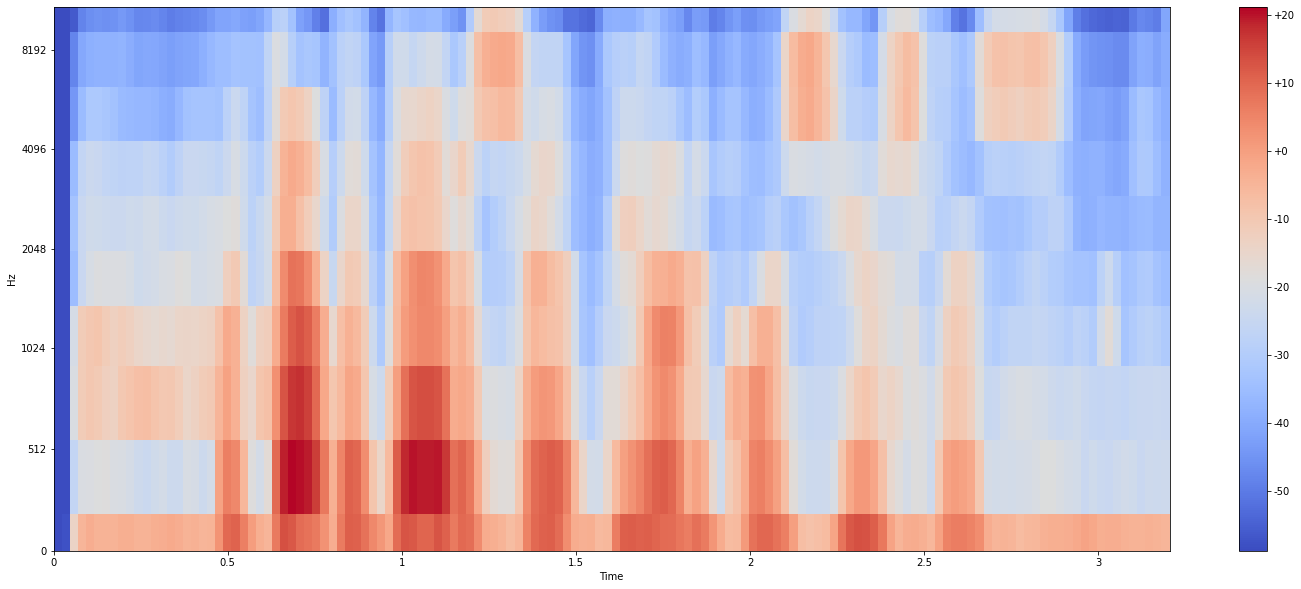

In [19]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

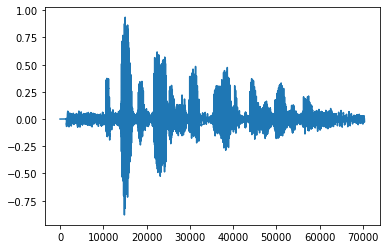

In [22]:
plt.plot(scale)

In [8]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

scale=np.interp(scale, (scale.min(), scale.max()), (-1, 1))
noise=get_white_noise(scale,SNR=5)
noise_audio = Audio._make_wav(noise,sr,noise.any())

In [24]:
noise_audio = Audio._make_wav(noise,sr,noise.any())
ipd.Audio(noise_audio)

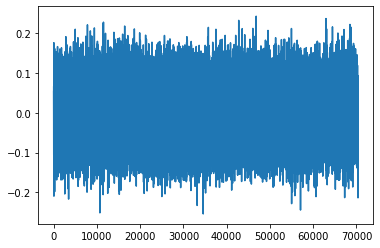

In [23]:
plt.plot(noise)

In [25]:
#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

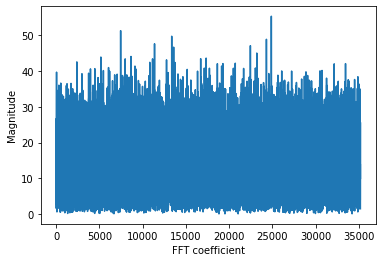

In [26]:
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise=scale+noise

In [10]:
import numpy as np

def mean_squared_error(x, y):
    return np.mean((x - y) ** 2)

In [33]:
sigaud = Audio._make_wav(signal_noise,sr,signal_noise.any())
soundfile.write('op.wav', signal_noise, sr) 
ipd.Audio(sigaud)

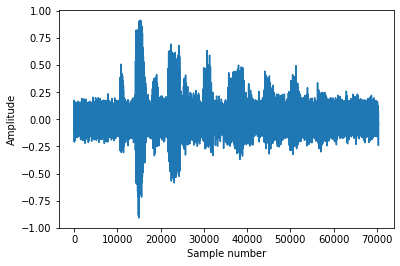

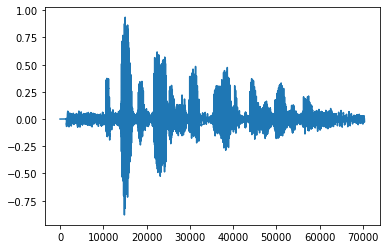

In [30]:
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

plt.plot(scale)

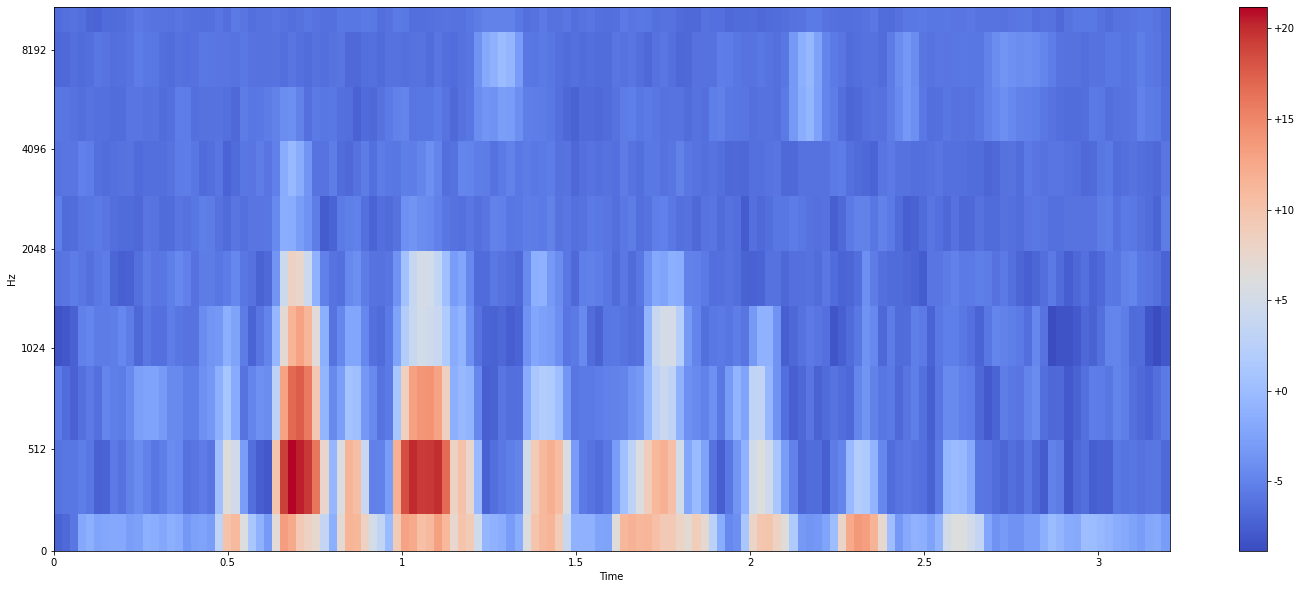

In [34]:
scale1, sr1 = librosa.load('op.wav')
mel_spectrogram1 = librosa.feature.melspectrogram(scale1, sr=sr1, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram1 = librosa.power_to_db(mel_spectrogram1)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram1, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr1)
plt.colorbar(format="%+2.f")
plt.show()

In [11]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=b9fe7cfaa00f406f8d90416f0c90f4524d71266b537f79761c228413ae268a1e
  Stored in directory: /root/.cache/pip/wheels/b4/fe/94/72ad3df3a67605236d3fac0891a64eef2eeedad1a1e0639076
Successfully built dtw


In [12]:
from dtw import dtw

def dynamic_time_warping(x, y):
    dist, _, _, _ = dtw(x, y, dist=lambda x, y: np.linalg.norm(x - y, ord=2))
    return dist

In [13]:
import librosa.feature as lf

# Load the original and adversarial audio files
original_audio,sample_rate = librosa.load('normal0.wav')
adversarial_audio,sample_rate = librosa.load('op.wav')
original_audio = original_audio.ravel()
adversarial_audio = adversarial_audio.ravel()

# Compute the MFCC features for each audio file
original_mfcc = lf.mfcc(original_audio, sr=sample_rate, n_mfcc=13)
adversarial_mfcc = lf.mfcc(adversarial_audio, sr=sample_rate, n_mfcc=13)

# Compute the loss between the two MFCC feature representations using the chosen distance metric
loss_rms = mean_squared_error(original_mfcc, adversarial_mfcc)
loss_dynamic = dynamic_time_warping(original_mfcc, adversarial_mfcc)
print(loss_rms)
print(loss_dynamic)

5776.896
6886.462631225586


In [39]:
trans = transcribe_audio('op.wav', model)

# Print transcription
print(trans)

he felt a greasewood


In [48]:
target_text = input('Please enter the target text: ')
print(target_text)

Please enter the target text: quick brown fox jumps over the lazy dog
quick brown fox jumps over the lazy dog


In [49]:
language = 'en'
myobj = gTTS(text=target_text, lang=language, slow=False)
print(myobj)
myobj.save('tts_audio.wav')

# Displaying the audio player widget
target_audio = 'tts_audio.wav'
ipd.Audio(target_audio)

In [51]:
# target_audio = AudioSegment.from_file(audio_file, format="wav") normal0
target_phrase, sr = librosa.load("tts_audio.wav", sr=None)

In [61]:
audio1 = AudioSegment.from_file("normal0.wav")
audio2 = AudioSegment.from_file("tts_audio.wav")

# Overlay audio2 on top of audio1, with audio2 starting at 0 seconds
combined = audio1.overlay(audio2, position=0)
combined.export("outputithink.wav", format="wav")
# combined.save('outputithink.wav')
ipd.Audio('outputithink.wav')